In [3]:
# Test with a single image
# Replace with the path to your test image
test_image_path = r"C:\Users\Dewmi Kaveesha\Downloads\tomatoesmain_wide-6aaa5b0e678269b06c482d5a7a317c846c739dcb.jpg"
display_prediction(test_image_path)

# Test with multiple images from a directory (optional)
def test_directory(directory_path, limit=5):
    image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:limit]
    
    for image_path in image_files:
        print(f"\nTesting: {os.path.basename(image_path)}")
        display_prediction(image_path)


NameError: name 'display_prediction' is not defined

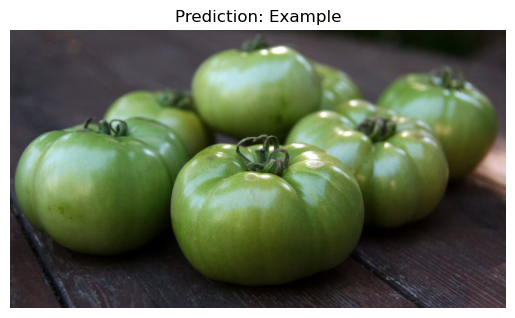

In [4]:
def display_prediction(image_path):
    # Example function to display image and make a prediction
    from PIL import Image
    import matplotlib.pyplot as plt

    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Prediction: Example")
    plt.show()

# Now call the function
test_image_path = r"C:\Users\Dewmi Kaveesha\Downloads\tomatoesmain_wide-6aaa5b0e678269b06c482d5a7a317c846c739dcb.jpg"
display_prediction(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


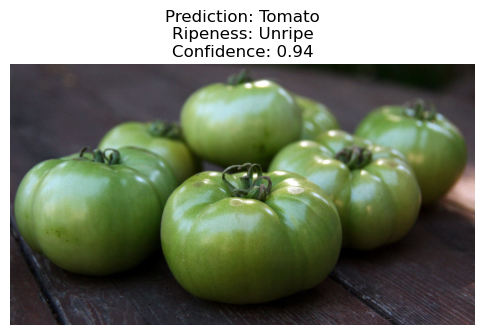

Predicted: Tomato (Unripe)
Confidence: 0.94

Top 3 predictions:
Tomato_Unripe: 0.9395
Bell Pepper_Ripe: 0.0346
Tomato_Ripe: 0.0251


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model_path = 'vegetable_ripeness_classifier_finetuned.keras'  # Update this path to where your model is saved
model = tf.keras.models.load_model(model_path)

# Define class mapping based on your actual training data
class_indices = {
    'Bell Pepper': 0, 
    'Bell Pepper_Overripe': 1, 
    'Bell Pepper_Ripe': 2, 
    'Bell Pepper_Unripe': 3, 
    'Cucumber': 4, 
    'Cucumber_Overripe': 5, 
    'Cucumber_Ripe': 6, 
    'Tomato': 7, 
    'Tomato_Overripe': 8, 
    'Tomato_Ripe': 9, 
    'Tomato_Unripe': 10, 
    'carrot': 11, 
    'carrot_Overripe': 12, 
    'carrot_Ripe': 13, 
    'potato': 14, 
    'potato_Overripe': 15, 
    'potato_Ripe': 16
}

# Invert the dictionary to map indices to class names
class_names = {v: k for k, v in class_indices.items()}

def predict_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    
    # Handle class names with or without ripeness information
    if '_' in predicted_class:
        parts = predicted_class.split('_')
        vegetable = parts[0]
        ripeness = parts[1] if len(parts) > 1 else "Unknown"
    else:
        vegetable = predicted_class
        ripeness = "Unknown"
    
    return {
        'vegetable': vegetable,
        'ripeness': ripeness,
        'confidence': float(confidence),
        'full_class': predicted_class,
        'raw_predictions': predictions[0]
    }

def display_prediction(image_path):
    result = predict_image(image_path)
    
    # Display the image
    img = load_img(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {result['vegetable']}\nRipeness: {result['ripeness']}\nConfidence: {result['confidence']:.2f}")
    plt.axis('off')
    plt.show()
    
    print(f"Predicted: {result['vegetable']} ({result['ripeness']})")
    print(f"Confidence: {result['confidence']:.2f}")
    
    # Show top 3 predictions
    top_indices = np.argsort(result['raw_predictions'])[-3:][::-1]
    print("\nTop 3 predictions:")
    for idx in top_indices:
        class_name = class_names[idx]
        confidence = result['raw_predictions'][idx]
        print(f"{class_name}: {confidence:.4f}")

# Test with your image
test_image_path = r"C:\Users\Dewmi Kaveesha\Downloads\tomatoesmain_wide-6aaa5b0e678269b06c482d5a7a317c846c739dcb.jpg"
display_prediction(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


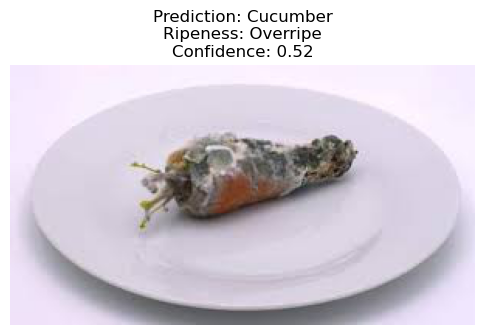

Predicted: Cucumber (Overripe)
Confidence: 0.52

Top 3 predictions:
Cucumber_Overripe: 0.5211
carrot_Overripe: 0.4544
Tomato_Overripe: 0.0142


In [7]:
# Test with a single image
# Replace with the path to your test image
test_image_path = r"C:\Users\Dewmi Kaveesha\Downloads\images (6).jpeg"
display_prediction(test_image_path)

# Test with multiple images from a directory (optional)
def test_directory(directory_path, limit=5):
    image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:limit]
    
    for image_path in image_files:
        print(f"\nTesting: {os.path.basename(image_path)}")
        display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


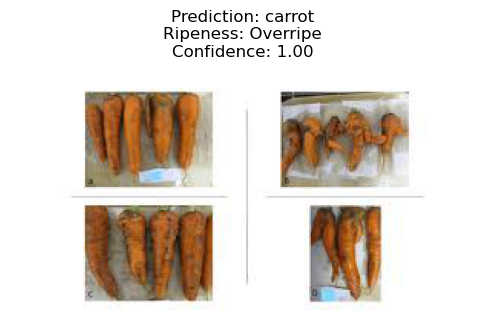

Predicted: carrot (Overripe)
Confidence: 1.00

Top 3 predictions:
carrot_Overripe: 0.9963
Cucumber_Overripe: 0.0017
carrot_Ripe: 0.0014


In [8]:
# Test with a single image
# Replace with the path to your test image
test_image_path = r"C:\Users\Dewmi Kaveesha\Downloads\images (7).jpeg"
display_prediction(test_image_path)

# Test with multiple images from a directory (optional)
def test_directory(directory_path, limit=5):
    image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:limit]
    
    for image_path in image_files:
        print(f"\nTesting: {os.path.basename(image_path)}")
        display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


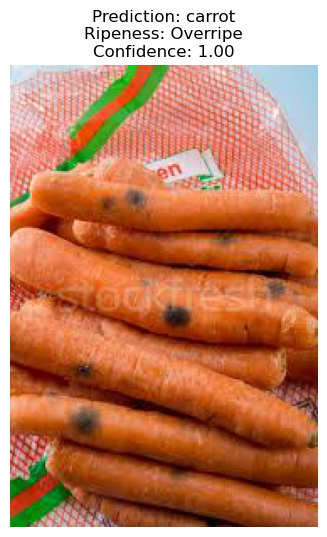

Predicted: carrot (Overripe)
Confidence: 1.00

Top 3 predictions:
carrot_Overripe: 0.9993
carrot_Ripe: 0.0006
Cucumber_Overripe: 0.0001


In [9]:
# Test with a single image
# Replace with the path to your test image
test_image_path = r"C:\Users\Dewmi Kaveesha\Downloads\images (4).jpeg"
display_prediction(test_image_path)

# Test with multiple images from a directory (optional)
def test_directory(directory_path, limit=5):
    image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:limit]
    
    for image_path in image_files:
        print(f"\nTesting: {os.path.basename(image_path)}")
        display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


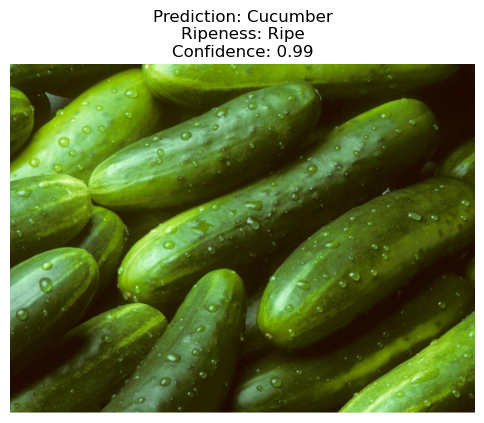

Predicted: Cucumber (Ripe)
Confidence: 0.99

Top 3 predictions:
Cucumber_Ripe: 0.9893
Cucumber_Overripe: 0.0088
carrot_Ripe: 0.0009


In [10]:
# Test with a single image
# Replace with the path to your test image
test_image_path = r"C:\Users\Dewmi Kaveesha\Downloads\YaRNn37EBePAAimtN33MR6-1280-80.jpg"
display_prediction(test_image_path)

# Test with multiple images from a directory (optional)
def test_directory(directory_path, limit=5):
    image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:limit]
    
    for image_path in image_files:
        print(f"\nTesting: {os.path.basename(image_path)}")
        display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


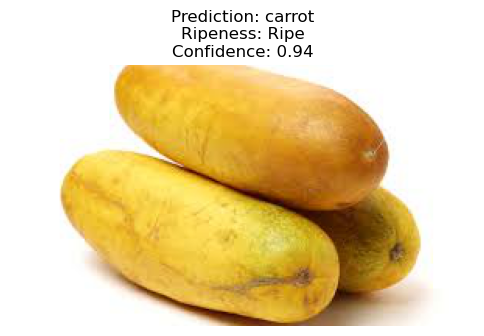

Predicted: carrot (Ripe)
Confidence: 0.94

Top 3 predictions:
carrot_Ripe: 0.9365
potato_Ripe: 0.0472
potato_Overripe: 0.0099


In [12]:
# Test with a single image
# Replace with the path to your test image
test_image_path = r"C:\Users\Dewmi Kaveesha\Downloads\images (11).jpeg"
display_prediction(test_image_path)

# Test with multiple images from a directory (optional)
def test_directory(directory_path, limit=5):
    image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:limit]
    
    for image_path in image_files:
        print(f"\nTesting: {os.path.basename(image_path)}")
        display_prediction(image_path)